<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

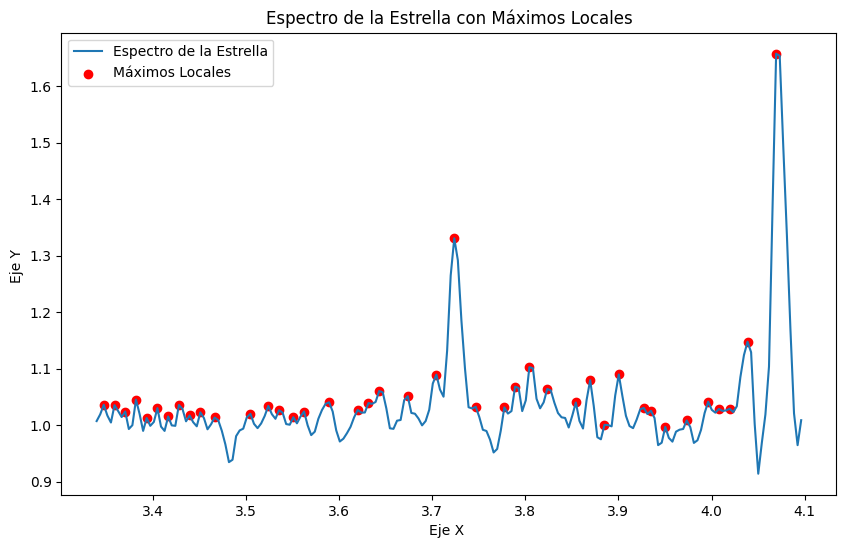

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.signal import argrelextrema


url = "https://docs.google.com/spreadsheets/d/1zGZ5sa8ug84A_3ifISPs_ajQIh4iwqgEFcm1rMu2KvE/export?format=csv"
df = pd.read_csv(url)

maximos_locales = argrelextrema(df['b'].values, np.greater)[0]
valores_maximos_locales = df['b'].iloc[maximos_locales]

datos = np.loadtxt("https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt")
x_espectro = datos[:, 0]
y_espectro = datos[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(x_espectro, y_espectro, label='Espectro de la Estrella')

x_maximos = df['b'].index[maximos_locales]
plt.scatter(x_espectro[x_maximos], y_espectro[x_maximos], c="red", label='Máximos Locales')

plt.title('Espectro de la Estrella con Máximos Locales')
plt.xlabel('Eje X ')
plt.ylabel('Eje Y ')

plt.legend()
plt.show()


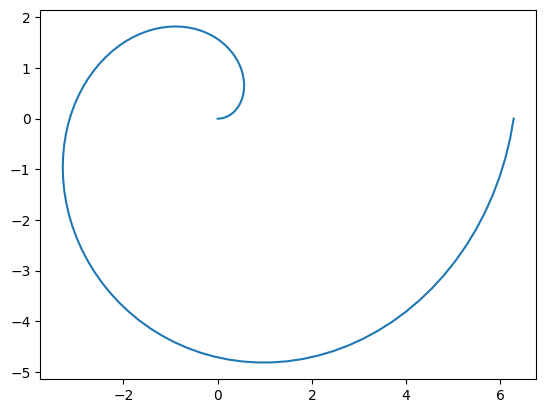

In [2]:

#2.0.5 Espiral de arquímedes
def Espiral_arquimedes(a,b,z):
  r=a+b*z
  return r
z=np.linspace(0,2*np.pi, 100)
a=0
b=1
r=Espiral_arquimedes(a,b,z)
plt.plot(r*np.cos(z),r*np.sin(z))
plt.show()

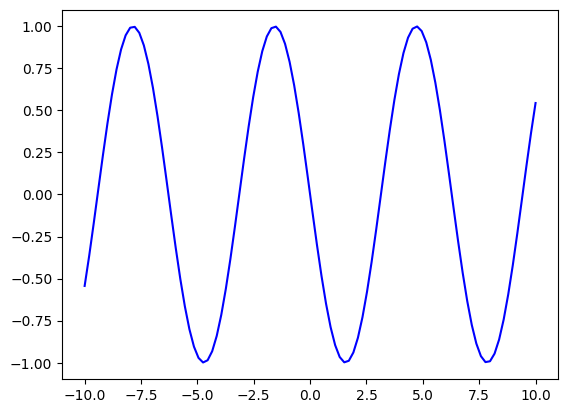

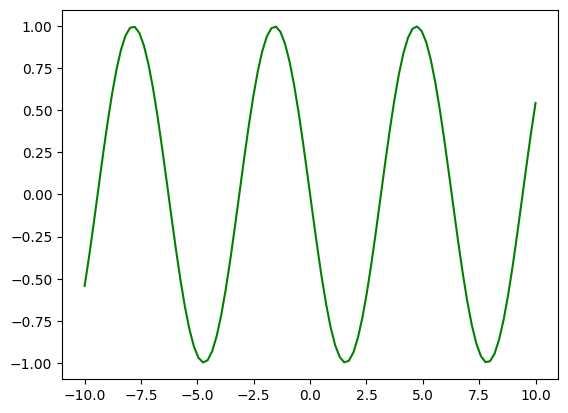

In [3]:
#Capitulo 4
#1
x= np.linspace(-10,10,100)
h=0.1
def f(x):
  return np.sin(x)
def segunda_derivada(f,x,h):
  return (f(x+h)-2*f(x)+f(x-h))/h**2
def segunda_derivada_alternativa(f,x,h):
  return (f(x+2*h) - 2*f(x) + f(x-2*h)) / (4*h**2)

plt.plot(x,segunda_derivada(f,x,h),"blue")
plt.show()
plt.plot(x,segunda_derivada_alternativa(f,x,h),"green")
plt.show()

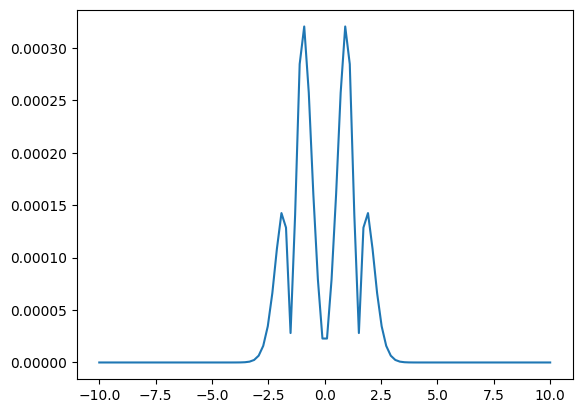

In [4]:
#2
def f(x):
  return 1/(np.sqrt(1+np.exp(-x**2)))
def CentralDerivative(f,x,h):

  d = 0.

  if h != 0:
    d = (f(x+h) - f(x-h))/(2*h)

  return d
h=0.05
x=np.linspace(-10,10,100)
df = CentralDerivative(f,x,h)
def derivada_exacta(f,x,h):
  return (x * np.exp(-x**2)) / ((1 + np.exp(-x**2))**(3/2))
error=np.abs(derivada_exacta(f,x,h)-df)
plt.plot(x,error)
plt.show()

In [6]:
#5
def cuarta_derivada(f,x,h):
  return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/(h**4)
def f(x):
  return np.cos(x)

x = 0
h = 0.01
valor_exacto = np.cos(x)
aproximacion = cuarta_derivada(f, x, h)
print("Valor exacto:", valor_exacto)
print("Aproximación:", aproximacion)
#Se puede notar el error de truncamiento que es de orden 4 donde a partir de la quinta cifra decimal se puede evidenciar un error.

Valor exacto: 1.0
Aproximación: 0.9999833627816201


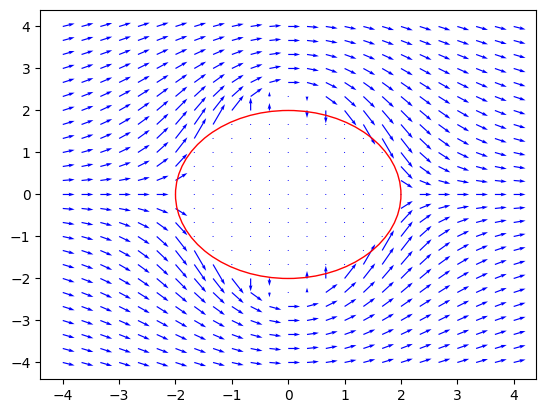

In [7]:
#6
#a
R=2
x = np.linspace(-4, 4, 25)
y = np.linspace(-4, 4, 25)
X, Y = np.meshgrid(x, y)

#b
V=2
def potencial(x,y):
  return 2*x*(1 - 2**2 / (x**2 + y**2))

#c
h=0.001
def CentralDerivative_x(potencial,x,y,h):

  d = 0.

  if h != 0:
    d = (potencial(x+h,y) - potencial(x-h,y))/(2*h)

  return d
def CentralDerivative_y(potencial,x,y,h):

  t= 0.

  if h != 0:
    t = (potencial(x,y+h) - potencial(x,y-h))/(2*h)

  return -t


vx=CentralDerivative_x(potencial,X,Y,h)*(X**2+Y**2)>4
vy=CentralDerivative_y(potencial,X,Y,h)
mascara = (X**2 + Y**2) <= R**2
vx[mascara] = 0
vy[mascara] = 0


#d
cilindro= plt.Circle((0, 0), R, color='red', fill=False)
plt.quiver(X,Y,vx,vy,color="blue")
plt.gca().add_patch(cilindro)
plt.show()